# GDP Assignment Code

# Part IA

Plot a graph for rows "% Growth over previous year" for all the states (not union territories) whose data is available, use as much data as possible for this exercise. Use the best fit line to represent the growth for each state. Draw a similar line graph for the nation as well.

Q. How will you compare the growth rates of any two states?

A. By calculating ratio.
   (Growth rate of state 1)/(Growth rate of state 1):(Growth rate of state 2)/(Growth rate of state      1)   
   Here, assuming (Growth rate of state 1) is greater than (Growth rate of state 2).
  
Q. Which states have been growing consistently fast, and which ones have been struggling? 
   Rank top 3 fastest and 3 slowest-growing states.
   
A. From the graph below, states having growth rate (Y-axis value) above 14 are high and consistently    growing fast.
   Top 3: Mozoram, Nagaland, Tripura.
   Bottom 3: Goa, Meghalaya, Sikkim.
   
Q. What is the Nation's average?

A. 11.87%.

Q. What has been the average growth rate of your home state, and how does it compare to the national    average?

A. My home state Andhra Pradesh growth rate is 12.63%. 
   My home state growth rate is greater than the nation's average 11.87%.

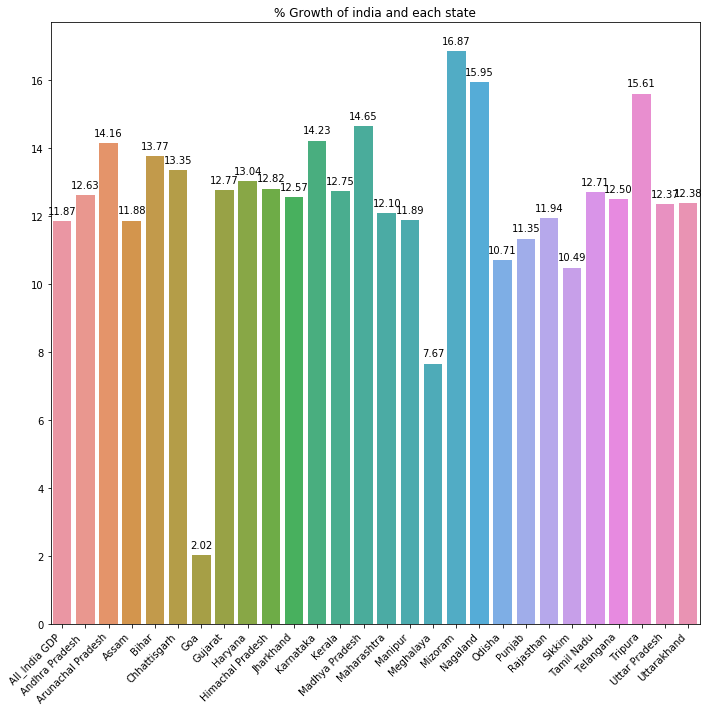

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.read_csv('C:\\Users\\chaitu07311\\Downloads\\Data\\Data_IA.csv', index_col='Duration')
df = df.dropna(axis=1, how='all')# drop columns where all elements are NA
df = df[df.isnull().sum(axis=1) < 12]  # drop rows where more than 7 columns are NA
#print(df)

#filter to only rows "% Growth over previous year"
df = df.loc[df['Items  Description'] == '(% Growth over previous year)']

#Exclude union territories
ut = ['Jammu & Kashmir','Andaman & Nicobar Islands','Chandigarh','Delhi','Puducherry']
df = df.loc[:, df.columns.difference(ut)]

#print(df)

#Plotting mean values across categorical variables 
plt.figure(figsize=(10, 10))
plt.title('% Growth of india and each state')
ax = sns.barplot(data=df, ci = None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

Plot the total GDP of the states for the year 2015-16

Q. Which Plot will you use for this? Why? (Remeber to plot the graph in a way such as it is easier to    read and compare)
A. Seaborn bar plots are more informative to show the distribution of values at each level of the        categorical variables. Input data can be passed in a variety of formats.

Q. Identify the top 5 and the bottom 5 states based on total GDP.
A. Top 5: Tamil Nadu, Uttar Pradesh, Karnataka, Gujarath, Andhra Pradesh.
   Bottom 5: Uttarakhand, Goa, Meghalaya, Arunachal Pradesh, Sikkim.
   
Q. What insights can you draw from this graph? What states are performing poorly? 
   (Remember: this will not be solely based on total GDP)
A. Bottom 5 states need to be distributed more funds from GDP.

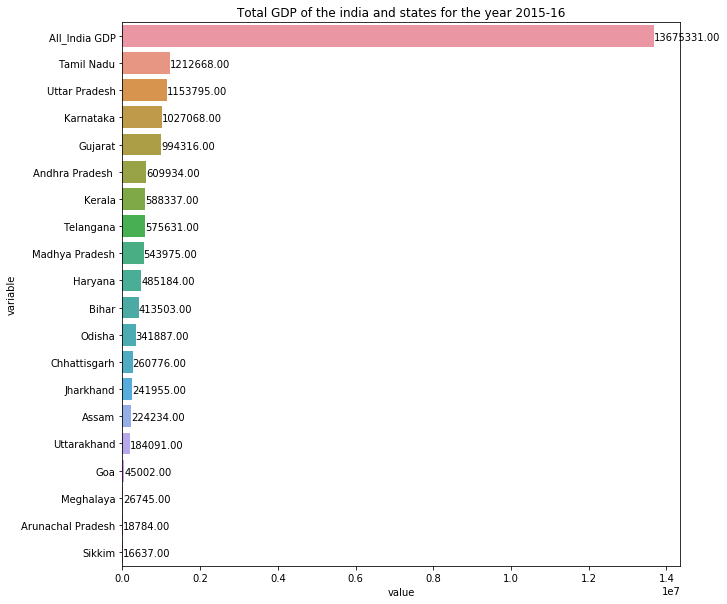

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.read_csv('C:\\Users\\chaitu07311\\Downloads\\Data\\Data_IA.csv')

#Exclude union territories.
ut = ['Jammu & Kashmir','Andaman & Nicobar Islands','Chandigarh','Delhi','Puducherry']
df = df.loc[:, df.columns.difference(ut)]

#filter only 2016-16 GSDP row data
df = df.loc[(df['Items  Description']=='GSDP - CURRENT PRICES (` in Crore)') & (df['Duration']=='2015-16')]
df = df.dropna(axis=1) #drop null values
df = df.select_dtypes(include ='float64') #select all columns having float datatype
df = df.sort_values(by=4, ascending=False, axis=1)
#print(df)
plt.figure(figsize=(10, 10))
plt.title('Total GDP of the india and states for the year 2015-16')
long_df = pd.melt(df)
ax = sns.barplot(y = long_df.variable, x = long_df.value)
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(), '{:1.2f}'.format(width), 
             ha='left', va='center')

# Part IB

- For the analysis below, use Data I-B. You can also use Data I-B along with Data I-A if required.     Also, perform the analysis only for the duration 2014-15. 
- Filter out the union territories (Delhi, Chandigarh, Andaman and Nicobar Islands, etc.) for further   analysis, as they are governed directly by the central, not state governments.

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import glob

os.chdir("C:\\Users\\chaitu07311\\Downloads\\Data\\")
all_filenames = [i for i in glob.glob('NAD-*.csv')]
dfs = []
for f in all_filenames:
    #print(f)
    df = pd.read_csv(f, encoding='ISO-8859-1')
    df = df[['S.No.','Item', '2014-15']]
    df['State'] = f.split('-')[1]
    #print(df)
    dfs.append(df) 

#combine all files in the list
dfs = pd.concat(dfs)
#export to a csv
dfs.to_csv("C:\\Users\\chaitu07311\\Downloads\\Data\\combined_csv.csv", index=False)
#print(dfs)

Plot the GDP per capita for all the states.

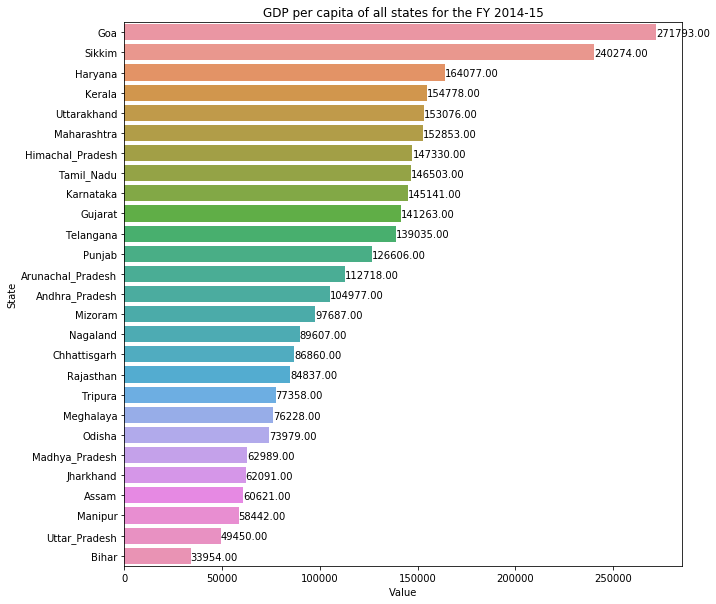

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.read_csv('C:\\Users\\chaitu07311\\Downloads\\Data\\combined_csv.csv')
states = df.State.unique()
df1 = []
for state in states:    
    df1.append(df.loc[(df['Item']=='Per Capita GSDP (Rs.)') & (df['State']==state)])
#combine all into the list
df1 = pd.concat(df1)
df1 = df1[['2014-15', 'State']] #select required columns
df1 = df1.sort_values('2014-15', ascending=False)
#print(df1)
fig, ax1 = plt.subplots(figsize=(10, 10))
plt.title('GDP per capita of all states for the FY 2014-15')
tidy = df1.melt(id_vars='State').rename(columns=str.title)
ax = sns.barplot(x='Value', y='State', data=tidy, ax=ax1)
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(), '{:1.2f}'.format(width), 
             ha='left', va='center')

Q. Identify the top 5 and the bottom 5 states based on the GDP per capita.

A. This can be identified from above plot
        - Top 5 are: Goa, Sikkim, Haryana, Kerala, Uttarakhand
        - Bottom 5 are: Jharkhand, Assam, Maipur, Uttar Pradesh, Bihar
    
Q. Find the ratio of the highest per capita GDP to the lowest per capita GDP.
    
A. This can be identified by following formula:
   (Highest per capita GDP (Goa)/Highest per capita GDP(Goa)) : (Lowest per capita GDP(Bihar)/Highest    per capita GDP (Goa)) 
   
   Goa : Bihar = (271793/271793):(33954/271793) = 1:(0.12) is the answer.

Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

Q. Which plot will you use here? Why?
A. Seaborn bar plots are more informative to show the distribution of values at each level of the        categorical variables. Input data can be passed in a variety of formats.

Q. Why is (Primary + Secondary + Tertiary) not equal to total GDP?
A. Total GDP involves taxes, susidies of products as well.

                       State  Percentage
Item                                    
Primary       Andhra_Pradesh   30.968080
Secondary     Andhra_Pradesh   19.923102
Tertiary      Andhra_Pradesh   41.850453
Primary    Arunachal_Pradesh   42.774946
Secondary  Arunachal_Pradesh   17.152064
Tertiary   Arunachal_Pradesh   37.696846
Primary                Assam   26.889201
Secondary              Assam   20.359070
Tertiary               Assam   46.982347
Primary                Bihar   21.448437
Secondary              Bihar   16.005825
Tertiary               Bihar   59.317437
Primary         Chhattisgarh   27.239629
Secondary       Chhattisgarh   35.061805
Tertiary        Chhattisgarh   32.295173
Primary                  Goa    7.681649
Secondary                Goa   38.085628
Tertiary                 Goa   42.778382
Primary              Gujarat   17.750506
Secondary            Gujarat   36.896684
Tertiary             Gujarat   33.764756
Primary              Haryana   18.379705
Secondary       

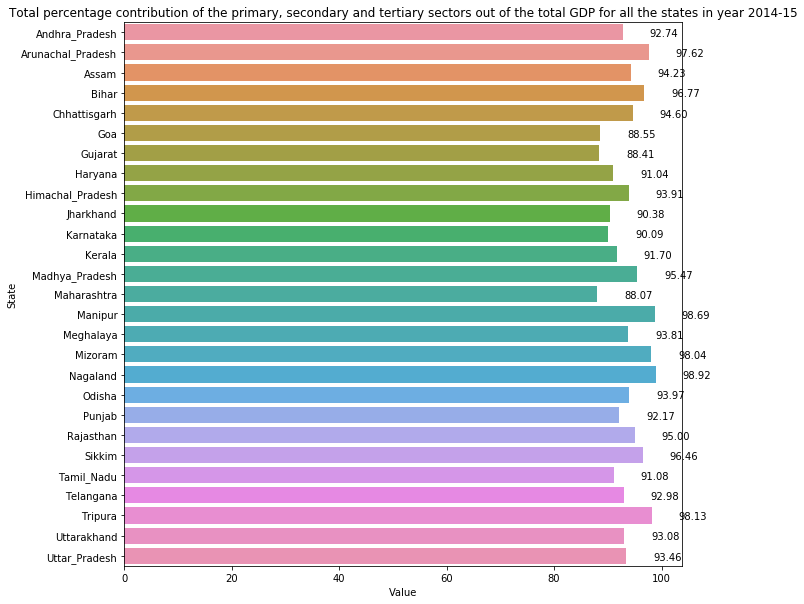

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.read_csv('C:\\Users\\chaitu07311\\Downloads\\Data\\combined_csv.csv')
states = df.State.unique()
df1 = []
for state in states:    
    df1.append(df.loc[((df['Item']=='Primary') | (df['Item']=='Secondary') |
                      (df['Item']=='Tertiary') | (df['Item']=='Gross State Domestic Product'))
                      & (df['State']==state)])
#combine all into the list
df1 = pd.concat(df1)
df1.set_index("Item", inplace = True) 
df1 = df1[['State', 'Percentage']] #select required columns
df1 = df1.loc[df1['Percentage'] < 100] #To filter GSDP column where it is 100%
print(df1)
fig, ax1 = plt.subplots(figsize=(10, 10))
plt.title('Total percentage contribution of the primary, ' +
          'secondary and tertiary sectors out of the total GDP for all the states in year 2014-15')
tidy = df1.melt(id_vars='State').rename(columns=str.title)
ax = sns.barplot(x='Value', y='State', data=tidy, ax=ax1, ci=None, estimator=sum)
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(), '{:1.2f}'.format(width), 
             ha='left', va='center')

Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.
- Note: Categorisation into four groups will simplify the subsequent analysis, as otherwise, comparing the data of all the states would become quite exhaustive.

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.read_csv('C:\\Users\\chaitu07311\\Downloads\\Data\\combined_csv.csv')
#states = df.State.unique()
df1 = []
#for state in states:    
df1.append(df.loc[df['Item']=='Per Capita GSDP (Rs.)'])
#combine all into the list
df1 = pd.concat(df1)
df1.set_index("State", inplace = True)

#Categorize each state and updated the csv accordingly
df1 = df1[['2014-15']] #select required columns
df1['Category'] = pd.qcut(df1['2014-15'], q=([0.20,0.5,0.85,1]), labels=False)
print(df1)

                    2014-15  Category
State                                
Andhra_Pradesh     104977.0       0.0
Arunachal_Pradesh  112718.0       1.0
Assam               60621.0       NaN
Bihar               33954.0       NaN
Chhattisgarh        86860.0       0.0
Goa                271793.0       2.0
Gujarat            141263.0       1.0
Haryana            164077.0       2.0
Himachal_Pradesh   147330.0       1.0
Jharkhand           62091.0       NaN
Karnataka          145141.0       1.0
Kerala             154778.0       2.0
Madhya_Pradesh      62989.0       NaN
Maharashtra        152853.0       1.0
Manipur             58442.0       NaN
Meghalaya           76228.0       0.0
Mizoram             97687.0       0.0
Nagaland            89607.0       0.0
Odisha              73979.0       0.0
Punjab             126606.0       1.0
Rajasthan           84837.0       0.0
Sikkim             240274.0       2.0
Tamil_Nadu         146503.0       1.0
Telangana          139035.0       1.0
Tripura     

For each category (C1, C2, C3, C4):
Q. Find the top 3/4/5 sub-sectors 
   (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and    tertiary) that contribute to approximately 80% of the GSDP of each category.

A. Result shows Top 5 sub-categories where you can find top 3/4/5 sub-sectors.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.read_csv('C:\\Users\\chaitu07311\\Downloads\\Data\\combined_csv.csv')
df = df.loc[(df['S.No.']!='Total') & 
            (df['Item'] != 'TOTAL GSVA at basic prices') &
            (df['Item'] != 'Taxes on Products') &
            (df['Item'] != 'Subsidies on products') &
            (df['Item'] != 'Gross State Domestic Product') &
            (df['Item'] != 'Population') &
            (df['Item'] != 'Per Capita GSDP (Rs.)')]
#print(df)
df_agg = df.groupby(['Category','Item']).agg({'2014-15':sum})
g = df_agg['2014-15'].groupby(level=0, group_keys=False)
res = g.nlargest(5)
#Result shows Top 5 sub-categories where you can find top 3/4/5 sub-sectors
print(res)

Category  Item                                                      
C1        Agriculture, forestry and fishing                              42226888.0
          Crops                                                          23676317.0
          Manufacturing                                                  22038331.0
          Trade, repair, hotels and restaurants                          17245309.0
          Real estate, ownership of dwelling & professional services     16224118.0
C2        Manufacturing                                                 109196530.0
          Real estate, ownership of dwelling & professional services     92121446.0
          Agriculture, forestry and fishing                              75209022.0
          Trade, repair, hotels and restaurants                          61238862.0
          Trade & repair services                                        55252334.0
C3        Real estate, ownership of dwelling & professional services     14740245.0
       

Plot the contribution of the sub-sectors as a percentage of the GSDP of each category.  

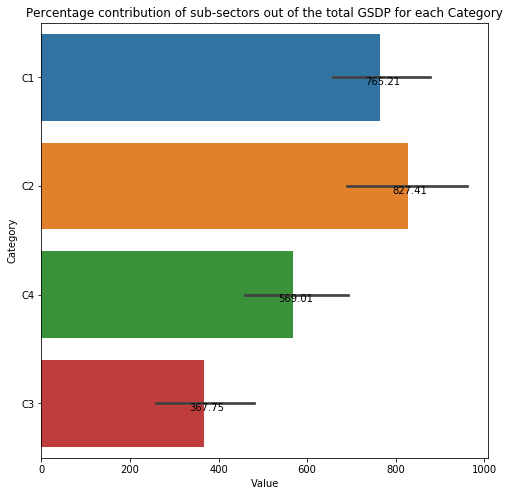

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.read_csv('C:\\Users\\chaitu07311\\Downloads\\Data\\combined_csv.csv')
states = df.State.unique()
df1 = []
for state in states:    
    df1.append(df.loc[((df['Item']=='Primary') | (df['Item']=='Secondary') |
                      (df['Item']=='Tertiary') | (df['Item']=='Gross State Domestic Product'))
                      & (df['State']==state)])
#combine all into the list
df1 = pd.concat(df1)
df1.set_index("Item", inplace = True) 
df1 = df1[['Category', 'Percentage']] #select required columns
df1 = df1.loc[df1['Percentage'] < 100] #To filter GSDP column where it is 100%
#print(df1)
fig, ax1 = plt.subplots(figsize=(8, 8))
plt.title('Percentage contribution of sub-sectors out of the total GSDP for each Category')
tidy = df1.melt(id_vars='Category').rename(columns=str.title)
ax = sns.barplot(x='Value', y='Category', data=tidy, ax=ax1, estimator=sum)
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(), '{:1.2f}'.format(width), 
             ha='center', va='center')

Q. How does the GDP distribution of the top states (C1) differ from the others?
A. GDP distribution of C1 and C2 are nearer and far from C3 and C4.

Q. Which sub-sectors seem to be correlated with high GDP?
A. -Agriculture, forestry and fishing
   -Manufacturing
   -Real estate, ownership of dwelling & professional services

Q. Which sub-sectors do the various categories need to focus on?
A. 

C1        Manufacturing                                                  
          Trade, repair, hotels and restaurants
          Real estate, ownership of dwelling & professional services
C2        Agriculture, forestry and fishing                         
          Trade, repair, hotels and restaurants                     
          Trade & repair services                                   
C3        Trade, repair, hotels and restaurants                     
          Manufacturing                                             
          Construction                                              
C4        Trade, repair, hotels and restaurants                     
          Trade & repair services                                   
          Manufacturing 

# # Part II

Q. Analyse if there is any correlation of GDP per capita with dropout rates in education (primary,      upper primary and secondary) for the year 2014-2015 for each state. Choose an appropriate plot to    conduct this analysis.

A. GDP per capita is highly correlated with Upper primary school dropouts for the year 2014-15.

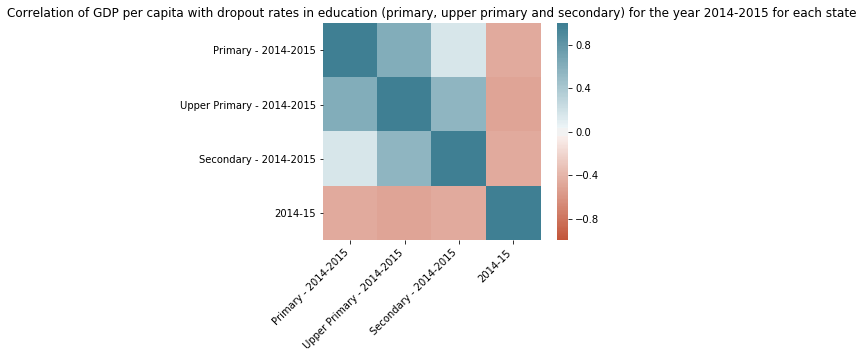

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv('C:\\Users\\chaitu07311\\Downloads\\Data\\Data_II.csv')

df = df.loc[(df['Level of Education - State'] != 'All India') &            
            (df['Level of Education - State'] != 'A & N Islands') & 
            (df['Level of Education - State'] != 'Chandigarh') &
            (df['Level of Education - State'] != 'Dadra & Nagar Haveli') & 
            (df['Level of Education - State'] != 'Daman & Diu') &
            (df['Level of Education - State'] != 'Delhi') & 
            (df['Level of Education - State'] != 'Jammu and Kashmir') &
            (df['Level of Education - State'] != 'Lakshadweep') &
            (df['Level of Education - State'] != 'Puducherry') &
            (df['Level of Education - State'] != 'West Bengal') 
           ]
df = df[['Level of Education - State','Primary - 2014-2015',
         'Upper Primary - 2014-2015','Secondary - 2014-2015']]
df.reset_index(inplace = True, drop = True) 
#print(len(df))

df1 = pd.read_csv('C:\\Users\\chaitu07311\\Downloads\\Data\\combined_csv.csv')
df1 = df1.loc[df1['Item'] == 'Per Capita GSDP (Rs.)']
df1 = df1['2014-15']
df1.reset_index(inplace = True, drop = True) 
#print(len(df1))

df2 = pd.concat([df, df1], axis=1)
#print(df2)

plt.title('Correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state')

corr = df2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Q. Is there any correlation between dropout rate and %contribution of each sector (Primary, Secondary    and Tertiary) to the total GDP?

A. No.

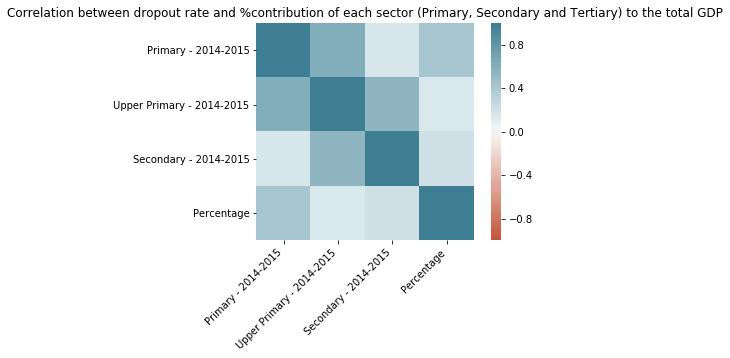

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv('C:\\Users\\chaitu07311\\Downloads\\Data\\Data_II.csv')

df = df.loc[(df['Level of Education - State'] != 'All India') &            
            (df['Level of Education - State'] != 'A & N Islands') & 
            (df['Level of Education - State'] != 'Chandigarh') &
            (df['Level of Education - State'] != 'Dadra & Nagar Haveli') & 
            (df['Level of Education - State'] != 'Daman & Diu') &
            (df['Level of Education - State'] != 'Delhi') & 
            (df['Level of Education - State'] != 'Jammu and Kashmir') &
            (df['Level of Education - State'] != 'Lakshadweep') &
            (df['Level of Education - State'] != 'Puducherry') &
            (df['Level of Education - State'] != 'West Bengal') 
           ]
df = df[['Level of Education - State','Primary - 2014-2015',
         'Upper Primary - 2014-2015','Secondary - 2014-2015']]
df.reset_index(inplace = True, drop = True) 
#print(len(df))

df1 = pd.read_csv('C:\\Users\\chaitu07311\\Downloads\\Data\\combined_csv.csv')
df1 = df1.loc[df1['Item'] == 'TOTAL GSVA at basic prices']
df1 = df1['Percentage']
df1.reset_index(inplace = True, drop = True) 
#print(len(df1))

df2 = pd.concat([df, df1], axis=1)
#print(df2)

plt.title('Correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP')
corr = df2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Q. You have the total population of each state from the data in part I. Is there any correlation        between dropout rates and population? What is the expected trend and what is the observation?

A. Primary school dropout rate is high in all states for the year 2014-15.

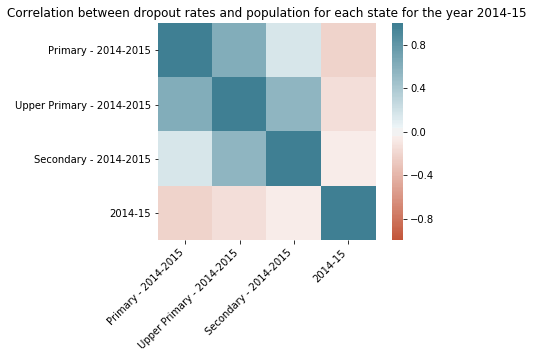

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv('C:\\Users\\chaitu07311\\Downloads\\Data\\Data_II.csv')

df = df.loc[(df['Level of Education - State'] != 'All India') &            
            (df['Level of Education - State'] != 'A & N Islands') & 
            (df['Level of Education - State'] != 'Chandigarh') &
            (df['Level of Education - State'] != 'Dadra & Nagar Haveli') & 
            (df['Level of Education - State'] != 'Daman & Diu') &
            (df['Level of Education - State'] != 'Delhi') & 
            (df['Level of Education - State'] != 'Jammu and Kashmir') &
            (df['Level of Education - State'] != 'Lakshadweep') &
            (df['Level of Education - State'] != 'Puducherry') &
            (df['Level of Education - State'] != 'West Bengal') 
           ]
df = df[['Level of Education - State','Primary - 2014-2015',
         'Upper Primary - 2014-2015','Secondary - 2014-2015']]
df.reset_index(inplace = True, drop = True) 
#print(len(df))

df1 = pd.read_csv('C:\\Users\\chaitu07311\\Downloads\\Data\\combined_csv.csv')
df1 = df1.loc[df1['Item'] == 'Population']
df1 = df1['2014-15']
df1.reset_index(inplace = True, drop = True) 
#print(len(df1))

df2 = pd.concat([df, df1], axis=1)
#print(df2)

plt.title('Correlation between dropout rates and population for the year 2014-15')
corr = df2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);